In [1]:
# Scikit-Learn: 머신러닝 알고리즘 라이브러리 (Python)

In [2]:
# Scikit_Learn: 데이터 표현 방식

"""
테이블로서의 데이터
=> 기본 테이블은 2차원 데이터 그리드
=> 행은 데이터세트의 개별 요소
=> 열은 이 각 요소와 관련된 수량
"""

import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
"""
각 데이터 행 => 관측된 꽃 / 표본(samples)
행의 수 => 데이터세트에 있는 꽃의 전체 개수 / (n_samples)

각 데이터 열 => 각 표본을 설명하는 특정 수량 정보 / 특징(feature)
열의 개수 => n_features
""";

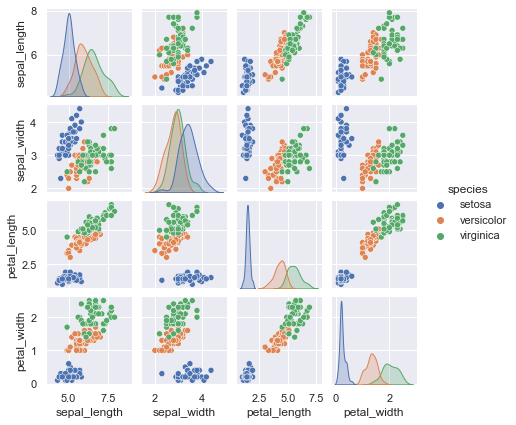

In [4]:
# 특징 행렬 (feature matrix)
"""
보통 X라는 변수에 저장
[n_samples, n_features] 모양을 가진 2차원 행렬이라고 가정
NumPy ndarray 혹은 Pandas DataFrame에 포함
SciPy 희박 행렬(sparse matrices)

표본 행 => 데이터세트가 설명하는 개별 객체
특징 열 => 각 표본을 정량적 방식으로 표현하는 개별 관측자
"""

# 대상 배열
"""
보통 y라고 부르는 레이블 또는 대상(target)배열
길이가 n_samples인 1차원 배열
NumPy ndarray, Pandas Series에 포함
연속적인 수치나 이산 클래스/레이블
2차원 [n_samples, n_targets] 대상 배열 형태로 다중 대상 값 처리가능

데이터로부터 예측하고자 하는 수량, 종속 변수
=> 붓꽃 데이터의 경우, "species"
"""

%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue="species", height=1.5);

In [5]:
# Pandas DataFrame 연산을 사용해 특징 행렬과 대상 배열 추출

# 특징 행렬 (X)
X_iris = iris.drop(columns="species")
X_iris.shape

(150, 4)

In [6]:
# 대상 배열
y_iris = iris["species"]
y_iris.shape

(150,)

In [7]:
# SciKit-Learn의 Estimator API
"""
일관성
검사(inspection)
제한된 객체 계층구조
구성
합리적인 기본값

=> SciKit-Learn에서 모든 머신러닝 알고리즘은 다양한 머신러닝 응용을
위한 일관된 인터페이스를 제공하는 Estimator API를 통해 구현
"""

# API 기초
"""
1. SciKit-Learn으로부터 적절한 추정기(estimator) 클래스를 임포트해서 모델의 클래스 선택
2. 이 클래스를 원하는 값으로 인스턴스화해서 모델의 초모수(hyperparameters) 선택
3. 데이터를 앞에서 논의한 내용에 따라 특징 배열과 대상 백터로 배치
4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
5. 모델을 새 데이터에 적용
    - 지도 학습인 경우 대채로 predict() 메서드를 사용해 알려지지 않은 데이터에 대한 레이블 예측
    - 비지도 학습인 경우 대채로 transform(), predict() 메서드를 사용해 데이터 속성 변환, 추론
""";

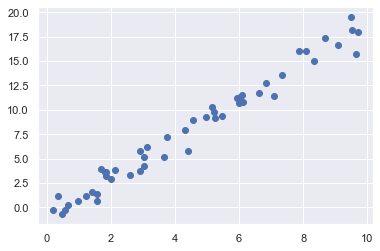

In [8]:
# 지도 학습 예제: 간단한 선형 회귀
import matplotlib.pyplot as plt, numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [9]:
# 1. 모델 클래스를 선택한다
from sklearn.linear_model import LinearRegression

In [10]:

# 2. 모델 초모수를 선택한다
"""
모델 클래스가 모델 인스턴스와 같지 않다는 사실
? 오프셋에 적합시킬 것인가
? 모델을 정규화할 것인가
? 모델 유연성을 높이기 위해 특징을 사전 처리할 것인가
? 모델에서 어느 정도의 정규화를 사용할 것인가
? 얼마나 많은 모델 성분을 사용할 것인가
"""
# 선형 회귀 예제에서 LinearRegression 클래스를 인스턴스화하고 fit_intercept 초모수를 사용해 절편을 적합
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
# 3. 데이터를 특징 행렬과 대상 벡터로 배치한다
"""
y는 이미 적절한 형식(길이가 n_samples인 배열)
x는 크기가 [n_samples, n_features]인 행렬로 만들기
    => n_samples = 50, n_features = 1
    => 간단하게 1차원 배열의 모양을 변경하면 된다
"""
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
# 4. 모델을 데이터에 적합시킨다
# => fit() 메서드
model.fit(X, y)

# 결과는 모델 저용 속성에 저장되여 모수는 모두 뒤에 밑줄 표시(_)가 붙는다
print(model.coef_); print(model.intercept_);

[1.9776566]
-0.903310725531111


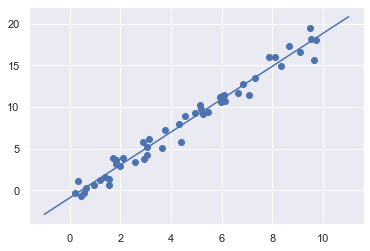

In [13]:
# 5. 알려지지 않은 데이터에 대한 레이블을 예측한다
# => predict() 메서드
xfit = np.linspace(-1, 11)

# xfit을 특징 행렬 [n_samples, n_features]에 맞추기
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# 결과 플로팅
plt.scatter(x, y)
plt.plot(xfit, yfit); # 결과를 이미 알고 잇는 기준선과 비교해 효능을 평가

In [14]:
# 지도 학습 예제: 붓꽃 분류
# 가우스 나이브 베이즈 (Gaussian Naive Bayes), 매우 간단한 생성 모델 (generative model)
# 초모수 선택 불필요 => 더 정교한 모델을 통해 개선을 여지를 살펴보기전 기본 분류로 사용

# 데이터를 훈련 자료와 테스트 자료로 나누기 (train_test_split)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [15]:
# 머신러닝 절차
from sklearn.naive_bayes import GaussianNB # 1. 모델 클래스 선택
model = GaussianNB() # 2. 모델 인스턴스화
model.fit(Xtrain, ytrain) # 3. 모델을 데이터에 적합
y_model = model.predict(Xtest) # 4. 새 데이터에 대한 예측

"""
*train_test_split => splits original dataset into random two parts: train data(75%) / test data(25%)
*build a model using a generative model, then apply back the Xtest (whose Ytest is known)
*verify the accuracy
""";

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)
# 정확도 97%이상, 생성 모델이 이 데이터세트에 대해서 효과적!

0.9736842105263158

In [17]:
# 비지도 학습 예제: 붓꽃 차원 (dimensionality reduction)
# 차원을 축소 (붓꽃 데이터 각 표본에 대한 특징 4가지, 4차원)
# => 데이터의 근본적인 특징은 유지, 더 낮은 차원을 가지는 적절한 표현
# => 차원 축소가 데이터 시각화를 지원

# 빠른 선형 차원 축소 기법인 주성분 분석 (PCA, principle component analysis)

from sklearn.decomposition import PCA # 1. 모델 클래스 선택
model = PCA(n_components=2) # 2. 초모수로 모델 인스턴스화
model.fit(X_iris) # 3. X_iris(4차원 데이터) x데이터에 적합, y는 지정 안 함
X_2D = model.transform(X_iris) # 4. 데이터를 2차원으로 변환

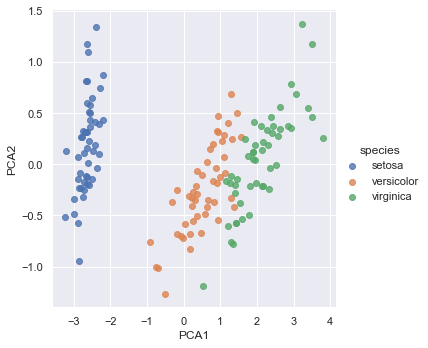

In [18]:
# 결과 플로팅
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue="species", fit_reg=False);
# PCA 알고리즘이 붓꽃종 레이블에 대한 지식이 없는데도 2차원 표현에서 종이 매우 잘 분리돼 있음

In [19]:
# 비지도 학습: 붓꽃 군집화 (clustering)
# 가우스 혼합 모델(GMM, Gaussian mixture model)
# => 데이터를 가우스 블롭(Gaussian blob)의 컬렉션으로 모델링

from sklearn.mixture import GaussianMixture # 1. 모델 클래스 선택
model = GaussianMixture(n_components=3,
            covariance_type="full") # 2. 초모수로 모델 인스턴스화, 3개의 그룹
model.fit(X_iris) # 3. x데이터에 적합, y는 지정 안 함
y_gmm = model.predict(X_iris) # 4. 군집 레이블 결정

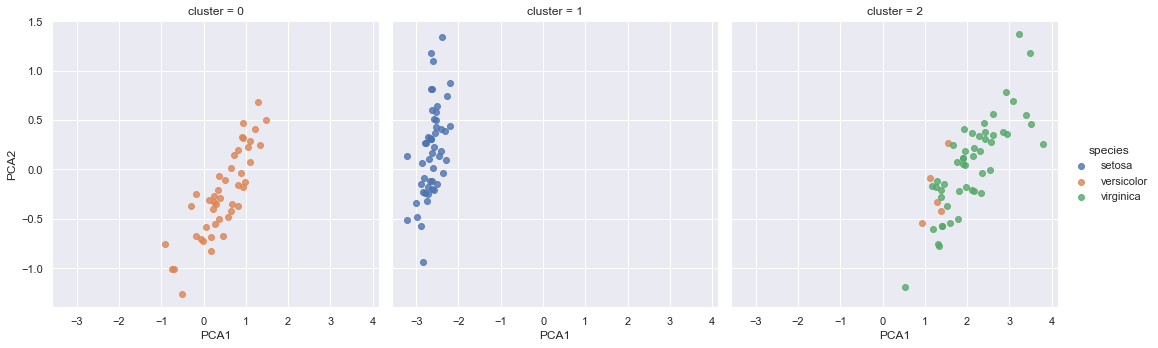

In [20]:
# 결과 플로팅
iris["cluster"] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue="species",
           col="cluster", fit_reg=False);

# setosa 종 와벽 군집, virginica와 versicolor종은 서로 약간 섞임

In [21]:
# 응용: 손으로 쓴 숫자 탐색

# 숫자 데이터 적재 및 시각화
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 1797개의 표본, 각 표본은 8x8 픽셀 그리드

(1797, 8, 8)

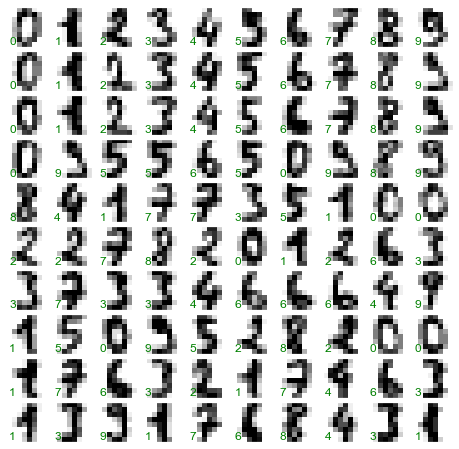

In [22]:
# 처음 100개를 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks":[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color="green")

In [23]:
# 이 데이터를 SciKit-Learn에서 작업 => 2차원 [n_samples, n_features] 표현이 필요
# 이미지의 각 픽셀을 특징으로 취급
# 픽셀 배열을 평평하게 펴서 각 숫자를 나타내는 픽셀값을 길이 64의 배열로 바꾸기 (data)
# 각 숫자에 대해 미리 결정된 레이블을 제공하는 대상 배열 필요 (target)

X = digits.data
y = digits.target
print(X.shape); print(y.shape);
# 1797개의 표본과 64개의 특징

(1797, 64)
(1797,)


In [24]:
# 비지도 학습: 차원 축소
# 64차원 모수 공간에 점을 시각화 하기란 매우 어렵다
# 2차원으로 줄이기
# 등거리 사상(Isomap)이라는 다양체 학습 알고리즘 (manifold learning) 사용
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

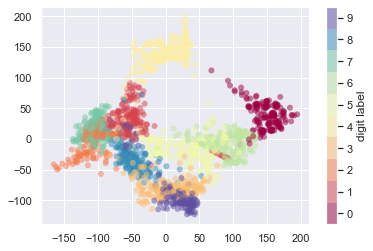

In [25]:
# 결과 플로팅
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor="none", alpha=0.5,
            cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5);

In [26]:
# 숫자 분류
# 훈련 자료와 테스트 자료로 나누고 가우스 나이브 베이즈 모델 적합
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)
# 정확도 약 80%, 어디에서 제데로 예측을 못 한 것인지 알 수 없음

0.8333333333333334

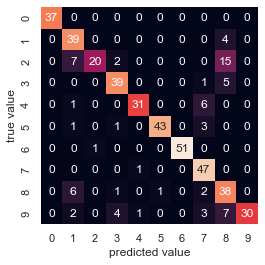

In [28]:
# 오차 행렬(confusion matrix)
# SciKit-Learn으로 계산, Seaborn으로 플로팅
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value"); plt.ylabel("true value");

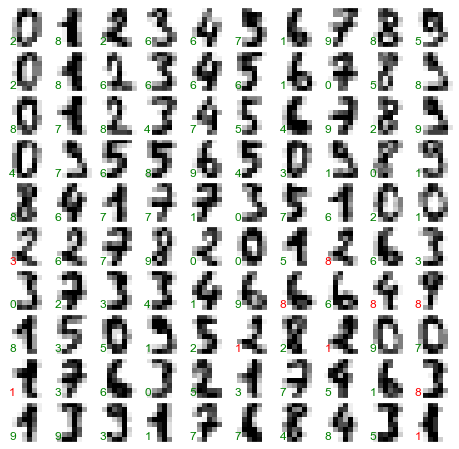

In [29]:
# 모델이 예측한 레이블로 입력데이터를 다시 플로팅
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks":[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color="green" if (y_test[i] == y_model[i]) else "red")

In [30]:
# 정리

"""
SciKit-Learn => Estimator API
1. 임포트
2. 인스턴스화
3. 적합
4. 예측
""";